In [1]:
%pylab inline
import pylab as plt

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import geopandas as gp
from datetime import datetime

from code.main import getSettings, data_preload
from code.misc.logger import getLogger
from code.misc import getRegScore

In [32]:
from code.iteration import iteration, iterate

# LOAD DATA

In [3]:
settings = getSettings()

In [4]:
start = datetime.now()  # start of the calculations

logger = getLogger()
settings['limit'] = None
settings['logger'] = logger
result_path = datetime.now().strftime(start.strftime(settings['results']))

In [5]:
poi, buff, reg = data_preload(settings, logger)

## Check Visually

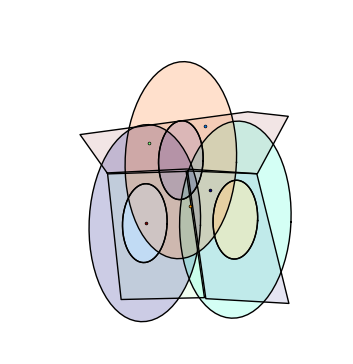

In [6]:
ax = reg.plot(alpha=.1)
buff.plot(alpha=.2, ax=ax)
poi.plot(ax=ax)

plt.axis('off');

# Check Poi Calculation

In [7]:
from code.misc import getPoiScore, adjustScore, getPOI

### Check Buffer coefficients

In [8]:
poi_test = poi.copy()
poi_test['type'] = pd.Series(['foot']*3 + ['stepless']*2)

In [9]:
result = adjustScore(poi_test, settings)

In [10]:
assert (result['score'] == pd.Series([320.0, 640.0, 80.0, 1500.0, 1000.0])).all()

## Check spatial grouping

In [11]:
x = getPOI(buff, poi, settings)

In [12]:
assert len(x)==10

In [13]:
x = adjustScore(x, settings)

In [15]:
result_score = x.groupby('office_id').agg({'score': 'sum'})
result_poi = x.groupby('office_id').agg({'pid': lambda x: list(x)})
print result_score

            score
office_id        
1          2080.0
2          1520.0
3          3040.0


In [16]:
print result_poi

                       pid
office_id                 
1                [3, 5, 1]
2                   [5, 2]
3          [3, 5, 1, 2, 4]


## Check overal function

In [17]:
poi_score, pois = getPoiScore(buff, poi, settings)

In [18]:
poi_score

,score
office_id,
1,2080.0
2,1520.0
3,3040.0


In [19]:
pois

,pid
office_id,
1,"[3, 5, 1]"
2,"[5, 2]"
3,"[3, 5, 1, 2, 4]"


# Check region calculations

## Check spatial part

In [20]:
results = []
for n, g in buff.reset_index().groupby('office_id'):
    r = gp.overlay(g, reg, how='intersection')
    results.append(r)
    
my_result = gp.GeoDataFrame(pd.concat(results))[['type','geometry','disabled', 'reg_area','office_id']]

In [21]:
my_result.shape

(15, 5)

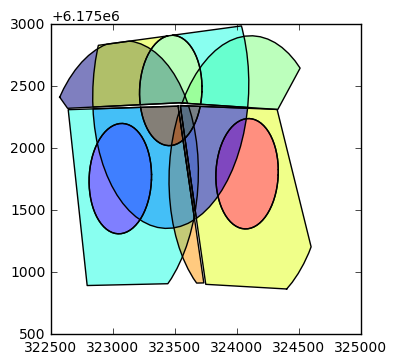

In [22]:
my_result.plot()

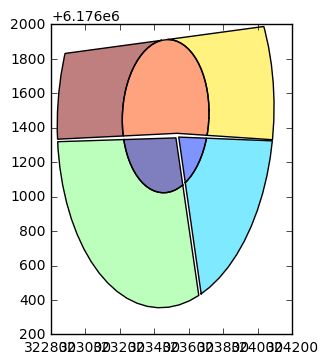

In [23]:
my_result[my_result['office_id']==3].plot()

In [24]:
my_result

,type,geometry,disabled,reg_area,office_id
0,foot,"POLYGON ((322569.6944128273 6177413.595974888,...",800,1.156767e+06,1
1,foot,"POLYGON ((323310.3556331785 6176790.093814585,...",1000,1.303664e+06,1
2,foot,"POLYGON ((323662.7476201417 6176497.762616686,...",2000,1.236994e+06,1
3,foot,"POLYGON ((323525.0569058114 6177341.294306075,...",1000,1.303664e+06,1
0,foot,"POLYGON ((323557.0034034352 6177366.168350809,...",800,1.156767e+06,2
1,foot,"POLYGON ((324400.3249126037 6175866.549602199,...",2000,1.236994e+06,2
2,foot,"POLYGON ((323532.2178882511 6177291.933233486,...",1000,1.303664e+06,2
3,foot,"POLYGON ((324332.6017424413 6176829.626446117,...",2000,1.236994e+06,2
0,foot,"POLYGON ((323222.4088805444 6177331.497032088,...",1000,1.303664e+06,3
1,foot,"POLYGON ((323579.2481288934 6177081.493049243,...",2000,1.236994e+06,3


In [25]:
my_result[my_result['office_id']==1].shape

(4, 5)

In [27]:
my_result['disabled'] * (my_result.area / my_result['reg_area'])

0     268.351435
1     269.440193
2      90.868259
3     679.812846
0     271.881359
1    1358.537272
2     137.299140
3     567.908665
0      62.940613
1      40.704721
2     462.100536
3     399.176487
4     174.966463
5     158.187374
6     143.870367
dtype: float64

## Check calculations

In [28]:
g = getRegScore(buff, reg, settings)

In [29]:
g

,score
office_id,
1,1044
2,1866
3,1150


# CHeck overal iteration

In [33]:
?iteration

In [ ]:
iteration(1, buff, poi, reg, COVERED, settings)